In [2]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram



Kickback is where the global phase added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation.

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

In the above circuit, since CNOT flips 0 and 1. The presence of CNOT makes no change. 
$|{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$

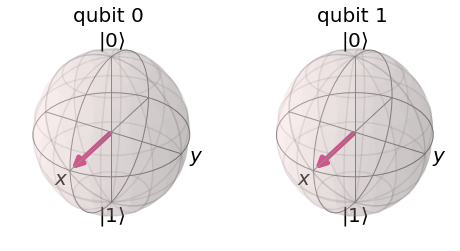

In [4]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

In [5]:
#Now, lets add negative phase to target qubit using Z gate.
#G gate flips 1 to -|1>, but does not affect |0>.
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(1)
qc.draw()

$|{-}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)$

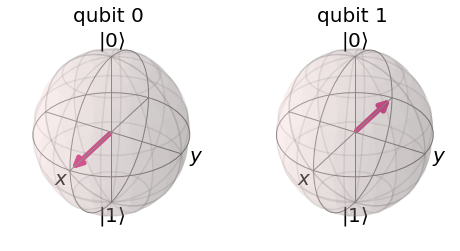

In [6]:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

Now if we add CNOT to this:

$\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
\text{CNOT}|{-}{+}\rangle & = |{-}{-}\rangle
\end{aligned}$


What's new here? Although we applied CNOT(0,1) the flip is seen as if its CNOT(1,0). The qubit '0' flipped. 

This is important because not all QC's allow direct CNOT(1,0). So, if you wish to get this effect, you need to build above circuit.

This is an example of Phase Cickback.


### Two equivalent circuits: 

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

In [9]:
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,unitary_backend).result().get_unitary()
unitary

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [11]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())

In [12]:
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,unitary_backend).result().get_unitary()
unitary

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

We see circuit 1 is equivalent to Circuit 2. 

## Phase Kickback

Kickback is where the global phase added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation.

Controlled T-Gate

$\text{T} = 
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}\\
\end{bmatrix}$\

$T|1\rangle = e^{i\pi/4}|1\rangle$

Let's add a Controlled-T to |1+>:

$\begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
\text{Controlled-T}|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\pi/4}|11\rangle) \\
& \\
\text{Controlled-T}|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\pi/4}|1\rangle)
\end{aligned}$

This looks like rotating our control qubit around the Z-axis of the Bloch sphere, while leaving the target qubit unchanged.